In [ ]:
import requests
url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv'
res = requests.get(url, allow_redirects=True)
with open('income.csv','wb') as file:
     file.write(res.content)

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
incomecluster = pd.read_csv('income.csv')
incomecluster

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [ ]:
incomecluster.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


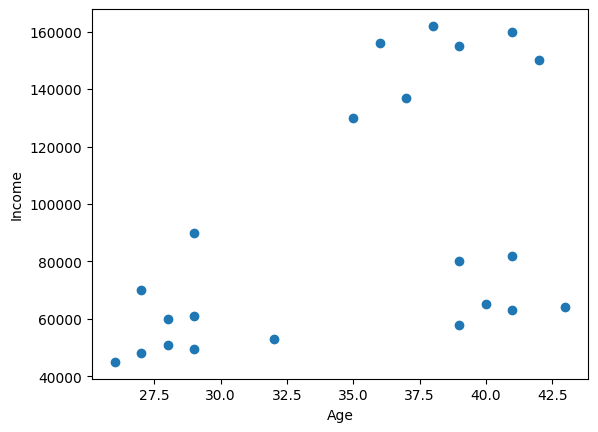

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(incomecluster['Age'],incomecluster['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(incomecluster[['Age','Income($)']])
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [ ]:
incomecluster['cluster'] = y_predict

In [ ]:
incomecluster

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [ ]:
incomecluster[incomecluster['cluster']==0]

,Name,Age,Income($),cluster
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0
14,Stark,29,49500,0
15,Ranbir,32,53000,0
16,Dipika,40,65000,0
17,Priyanka,41,63000,0
18,Nick,43,64000,0


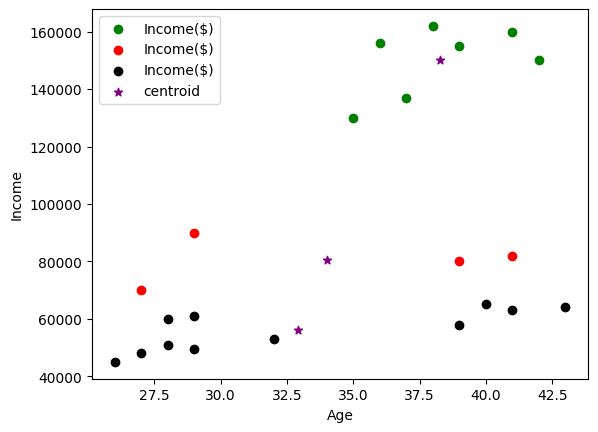

In [ ]:
c1 = incomecluster[incomecluster['cluster']==0]
c2 = incomecluster[incomecluster['cluster']==1]
c3 = incomecluster[incomecluster['cluster']==2]

plt.scatter(c1['Age'],c1['Income($)'],color='green',label='Income($)')
plt.scatter(c2['Age'],c2['Income($)'],color='red',label='Income($)')
plt.scatter(c3['Age'],c3['Income($)'],color='black',label='Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
#plt.show()
plt.legend()

In [ ]:
y = incomecluster[['cluster']]

In [ ]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

incomecluster['Age'] = scaler.fit_transform(incomecluster[['Age']])
incomecluster['Income($)'] = scaler.fit_transform(incomecluster[['Income($)']])
incomecluster

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


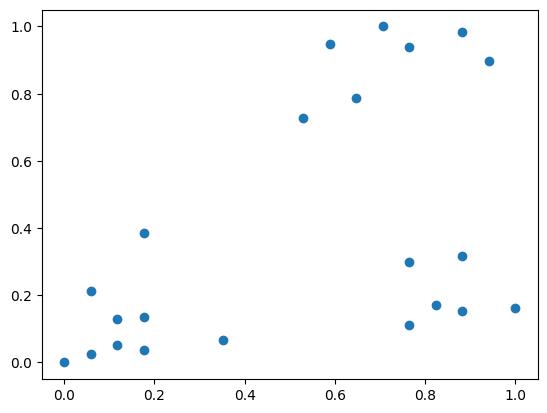

In [ ]:
plt.scatter(incomecluster['Age'],incomecluster['Income($)'])

In [ ]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(incomecluster[['Age','Income($)']])
print(y_pred)
km.labels_.tolist()

[2 2 2 2 0 0 0 0 0 0 0 2 2 2 2 2 1 1 1 1 1 1]


[2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]

In [ ]:
labels = km.labels_
labels

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
incomecluster['cluster'] = y_pred

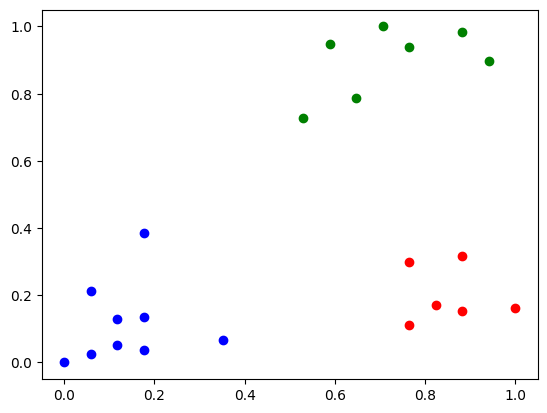

In [ ]:
c11 = incomecluster[incomecluster['cluster']==0]
c22 = incomecluster[incomecluster['cluster']==1]
c33 = incomecluster[incomecluster['cluster']==2]
plt.scatter(c11['Age'],c11['Income($)'],color='green')
plt.scatter(c22['Age'],c22['Income($)'],color='red')
plt.scatter(c33['Age'],c33['Income($)'],color='blue')

### Using Elbow method manually

In [ ]:
ssee = []
k_rng = range(1,10)
for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit(incomecluster[['Age','Income($)']])
    ssee.append(km.inertia_)

In [ ]:
print(ssee)

[5.434011511988178, 2.091136388699078, 0.4750783498553096, 0.3491047094419566, 0.2621792762345213, 0.22443334487241423, 0.1786300372679872, 0.14090581089405507, 0.1038375258660356]


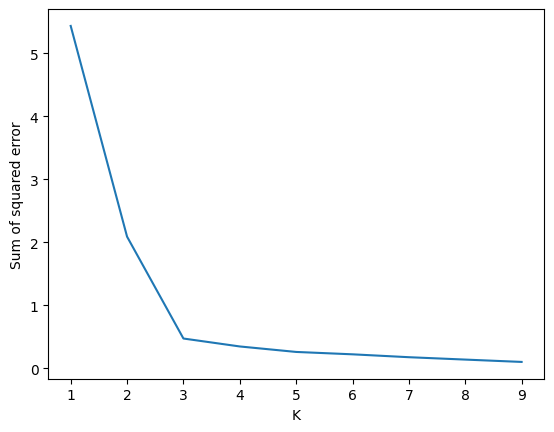

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,ssee)

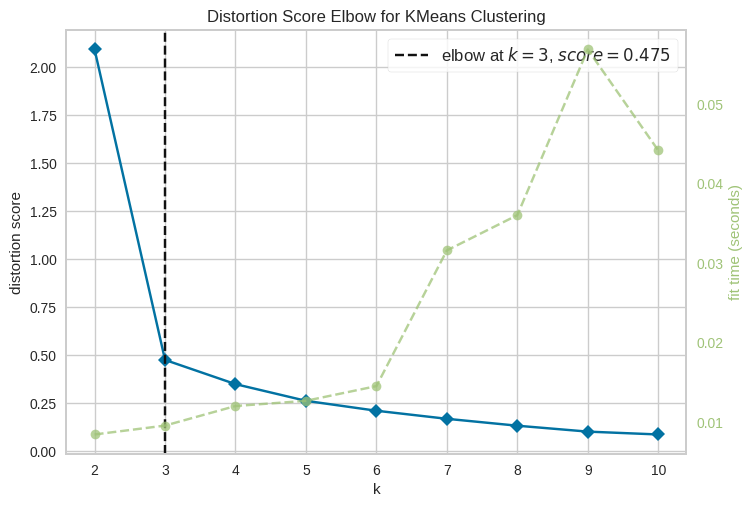

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(incomecluster[['Age','Income($)']])
Elbow_M.show()

In [ ]:
predicted_labels = incomecluster[['cluster']]
predicted_labels

,cluster
0,2
1,2
2,2
3,2
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(incomecluster[['Age','Income($)']],incomecluster['cluster'])

0.7129710183539274